## Paso 1: Planteamiento del problema y recopilación de datos

In [3]:
# Carga de la libreria
import pandas as pd

# Importaremos el conjunto de datos para comenzar a trabajar con él

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_test.csv")
test_survived_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/gender_submission.csv")
test_data["Survived"] = test_survived_data["Survived"]

total_data = pd.concat([train_data, test_data]).reset_index(inplace = False)
total_data.drop(columns = ["index"], inplace = True)
total_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Paso 2: Exploración y limpieza de datos

In [4]:
# Obtener las dimensiones
total_data.shape

(1309, 12)

In [5]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [7]:
# Eliminar duplicados
total_data.drop("PassengerId", axis = 1).duplicated().sum()

np.int64(0)

En este caso, no encontramos ningún valor duplicado. En el caso de que lo hubiésemos encontrado, el siguiente paso sería aplicar la función de drop_duplicates().

In [8]:
total_data = total_data.drop_duplicates(subset = total_data.columns.difference(['PassengerId']))
print(total_data.shape)
total_data.head()

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Excluiríamos de nuevo la columna identificativa, aunque podríamos repetir el análisis incluyéndola para enriquecer el análisis:

In [9]:
if total_data.duplicated().sum():
    total_data = total_data.drop_duplicates()
print(total_data.shape)
total_data.head()

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Eliminar información irrelevante

In [10]:
total_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True)
total_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Paso 3: Análisis de variables univariante

Análisis sobre variables categóricas

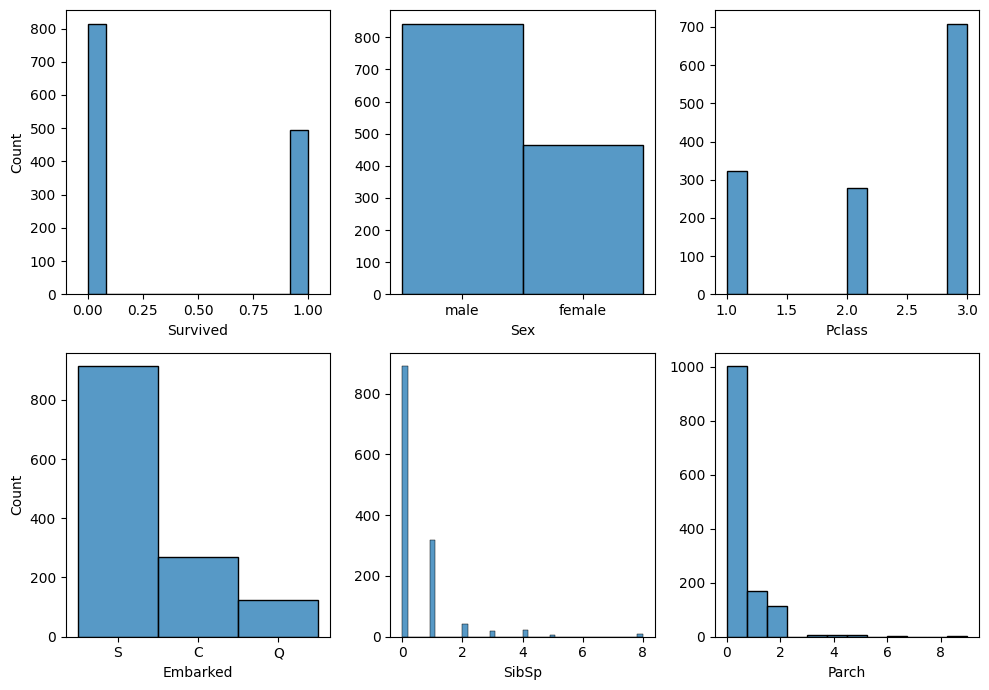

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = total_data, x = "Survived").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[0, 1], data = total_data, x = "Sex").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = total_data, x = "Pclass").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = total_data, x = "Embarked")
sns.histplot(ax = axis[1, 1], data = total_data, x = "SibSp").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = total_data, x = "Parch").set(ylabel = None)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Análisis sobre variables numéricas

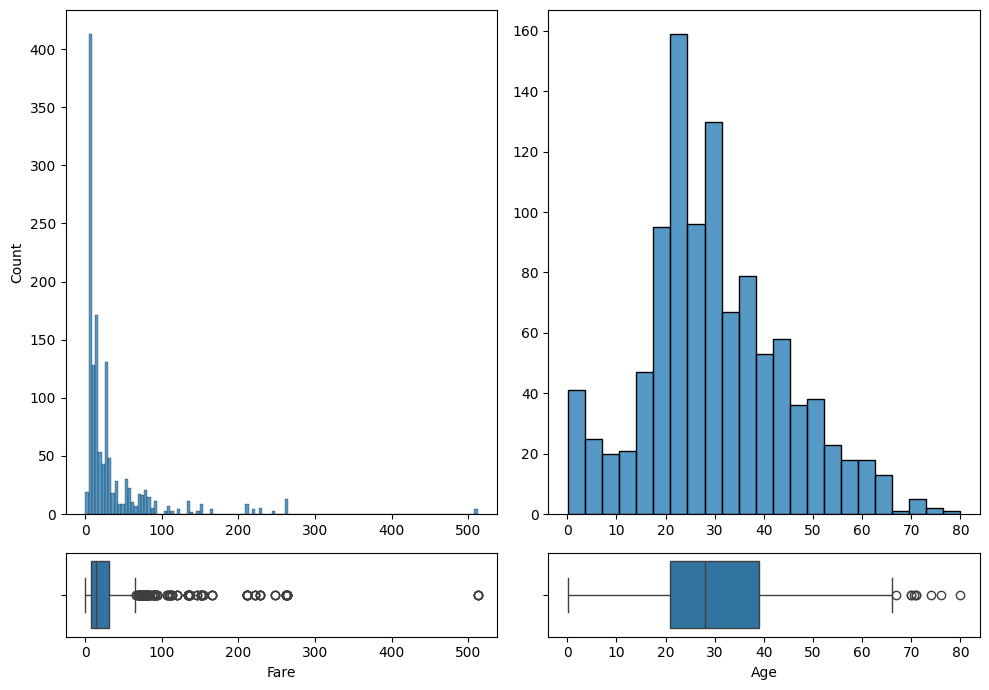

In [14]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "Fare").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "Fare")
sns.histplot(ax = axis[0, 1], data = total_data, x = "Age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "Age")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### Paso 4: Análisis de variables multivariante

Análisis numérico-numérico

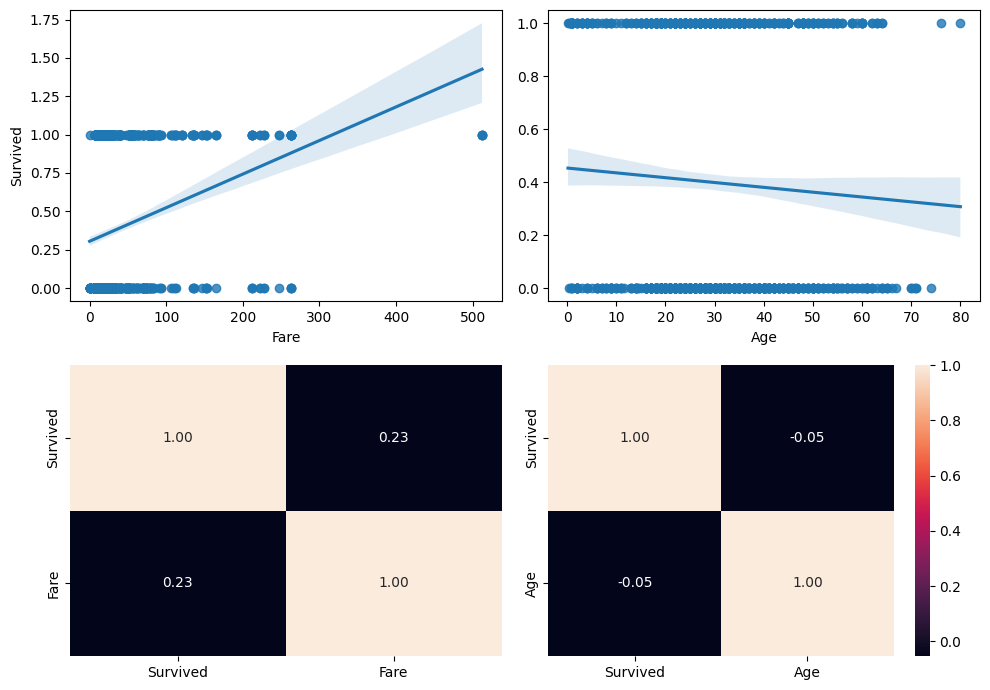

In [15]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_data, x = "Fare", y = "Survived")
sns.heatmap(total_data[["Survived", "Fare"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "Age", y = "Survived").set(ylabel=None)
sns.heatmap(total_data[["Survived", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

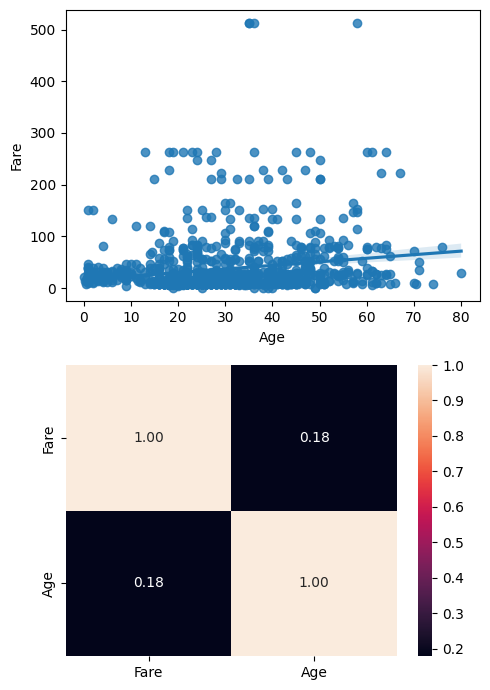

In [16]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = total_data, x = "Age", y = "Fare")
sns.heatmap(total_data[["Fare", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Análisis categórico-categórico

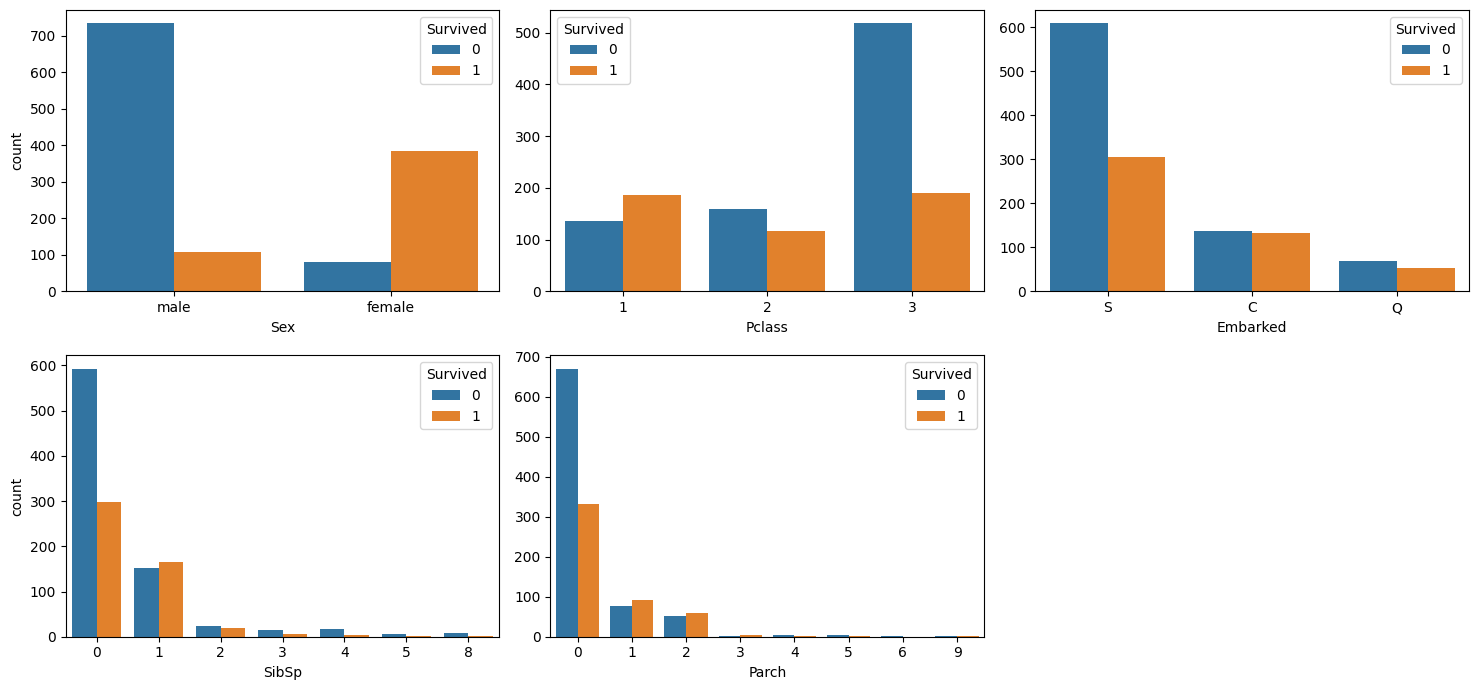

In [17]:
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = total_data, x = "Sex", hue = "Survived")
sns.countplot(ax = axis[0, 1], data = total_data, x = "Pclass", hue = "Survived").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = total_data, x = "Embarked", hue = "Survived").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = total_data, x = "SibSp", hue = "Survived")
sns.countplot(ax = axis[1, 1], data = total_data, x = "Parch", hue = "Survived").set(ylabel = None)

plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()

Combinaciones de la clase con varias predictoras

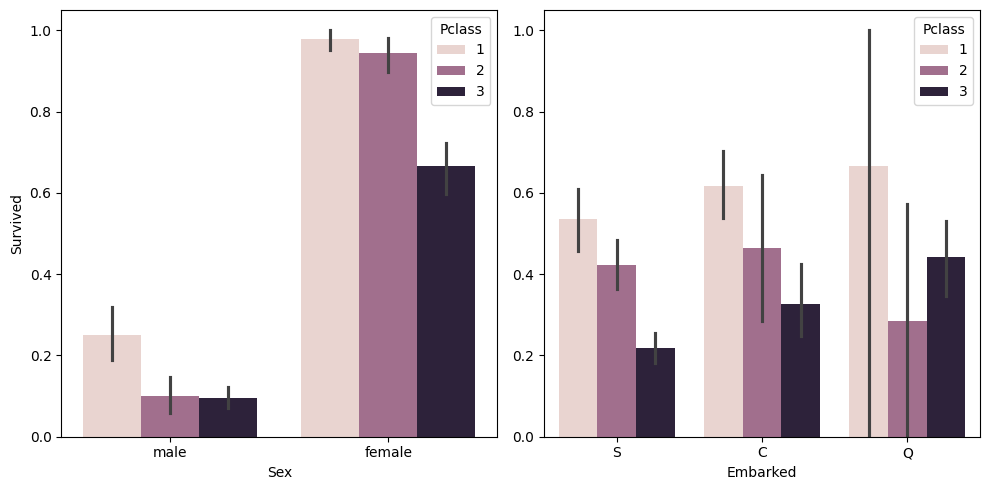

In [18]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = total_data, x = "Sex", y = "Survived", hue = "Pclass")
sns.barplot(ax = axis[1], data = total_data, x = "Embarked", y = "Survived", hue = "Pclass").set(ylabel = None)

plt.tight_layout()

plt.show()

Análisis de correlaciones

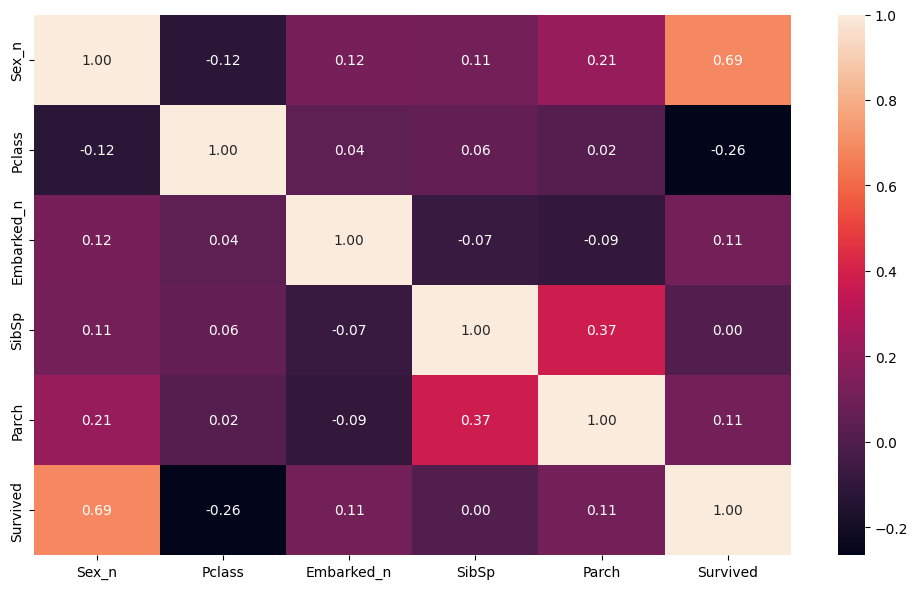

In [20]:
total_data["Sex_n"] = pd.factorize(total_data["Sex"])[0]
total_data["Embarked_n"] = pd.factorize(total_data["Embarked"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["Sex_n", "Pclass", "Embarked_n", "SibSp", "Parch", "Survived"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Análisis numérico-categórico (completo)

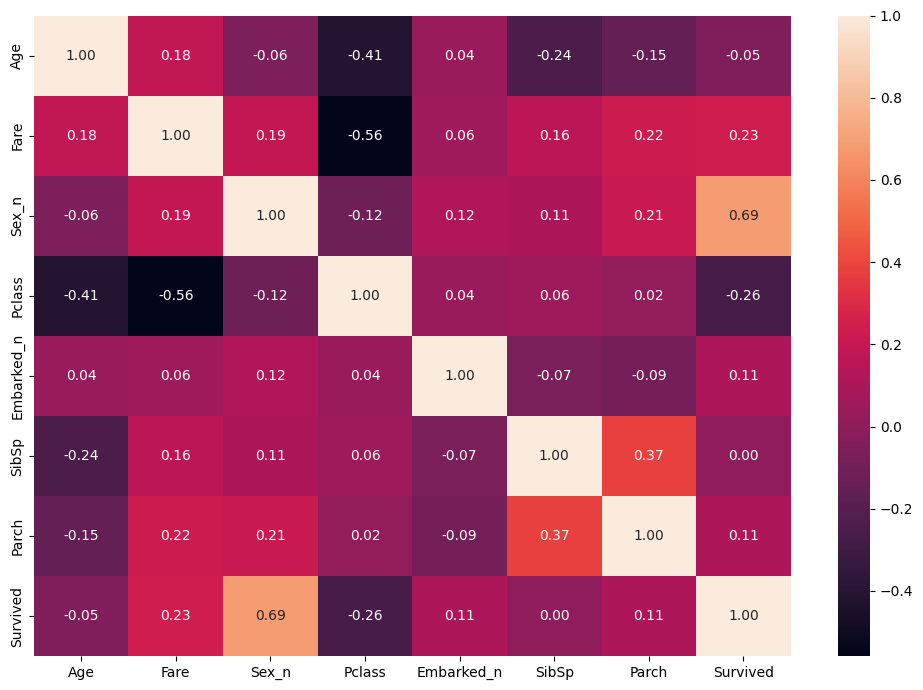

In [21]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(total_data[["Age", "Fare", "Sex_n", "Pclass", "Embarked_n", "SibSp", "Parch", "Survived"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

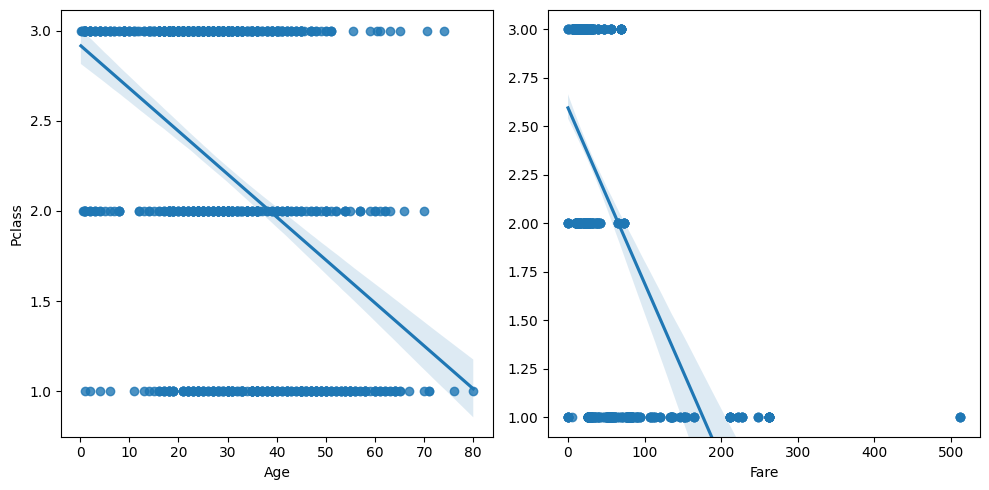

In [22]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = total_data, x = "Age", y = "Pclass")
sns.regplot(ax = axis[1], data = total_data, x = "Fare", y = "Pclass").set(ylabel = None, ylim = (0.9, 3.1))

plt.tight_layout()

plt.show()

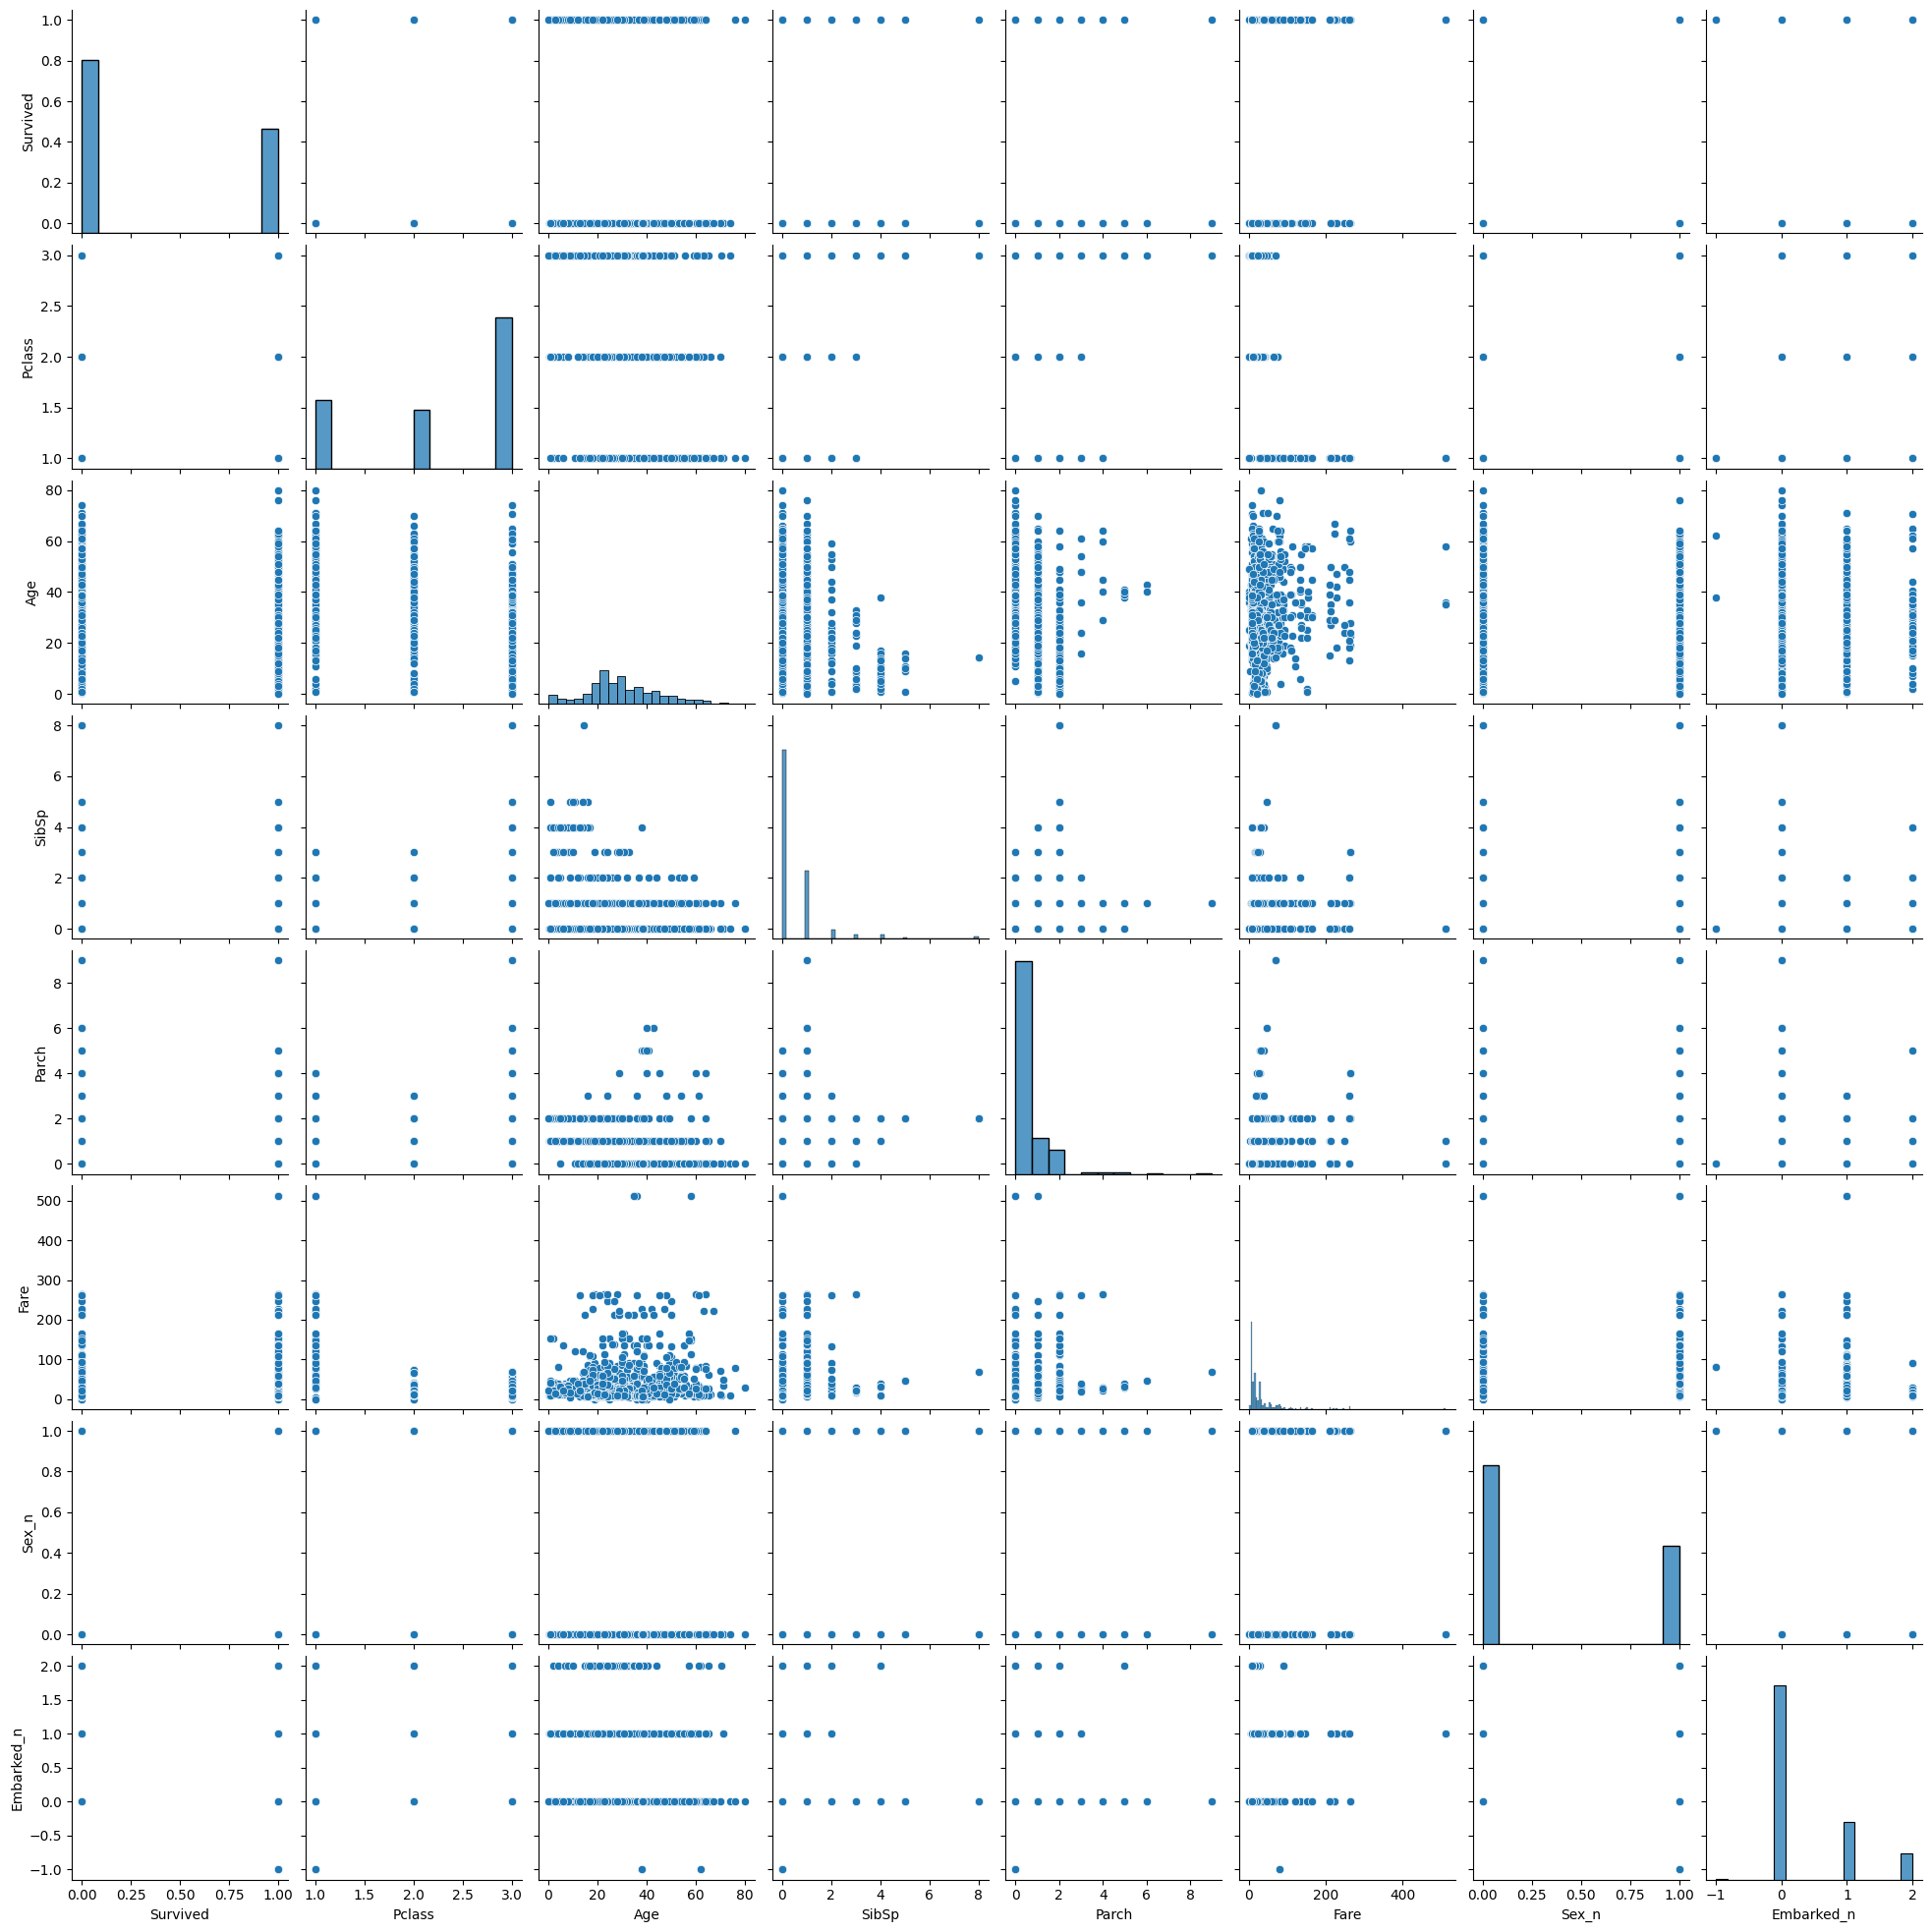

In [23]:
sns.pairplot(data = total_data)

### Paso 5: Ingeniería de características

#### Análisis de outliers 



In [24]:
total_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_n,Embarked_n
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000,1309.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479,0.355997,0.392666
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668,0.478997,0.655586
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,2.000000


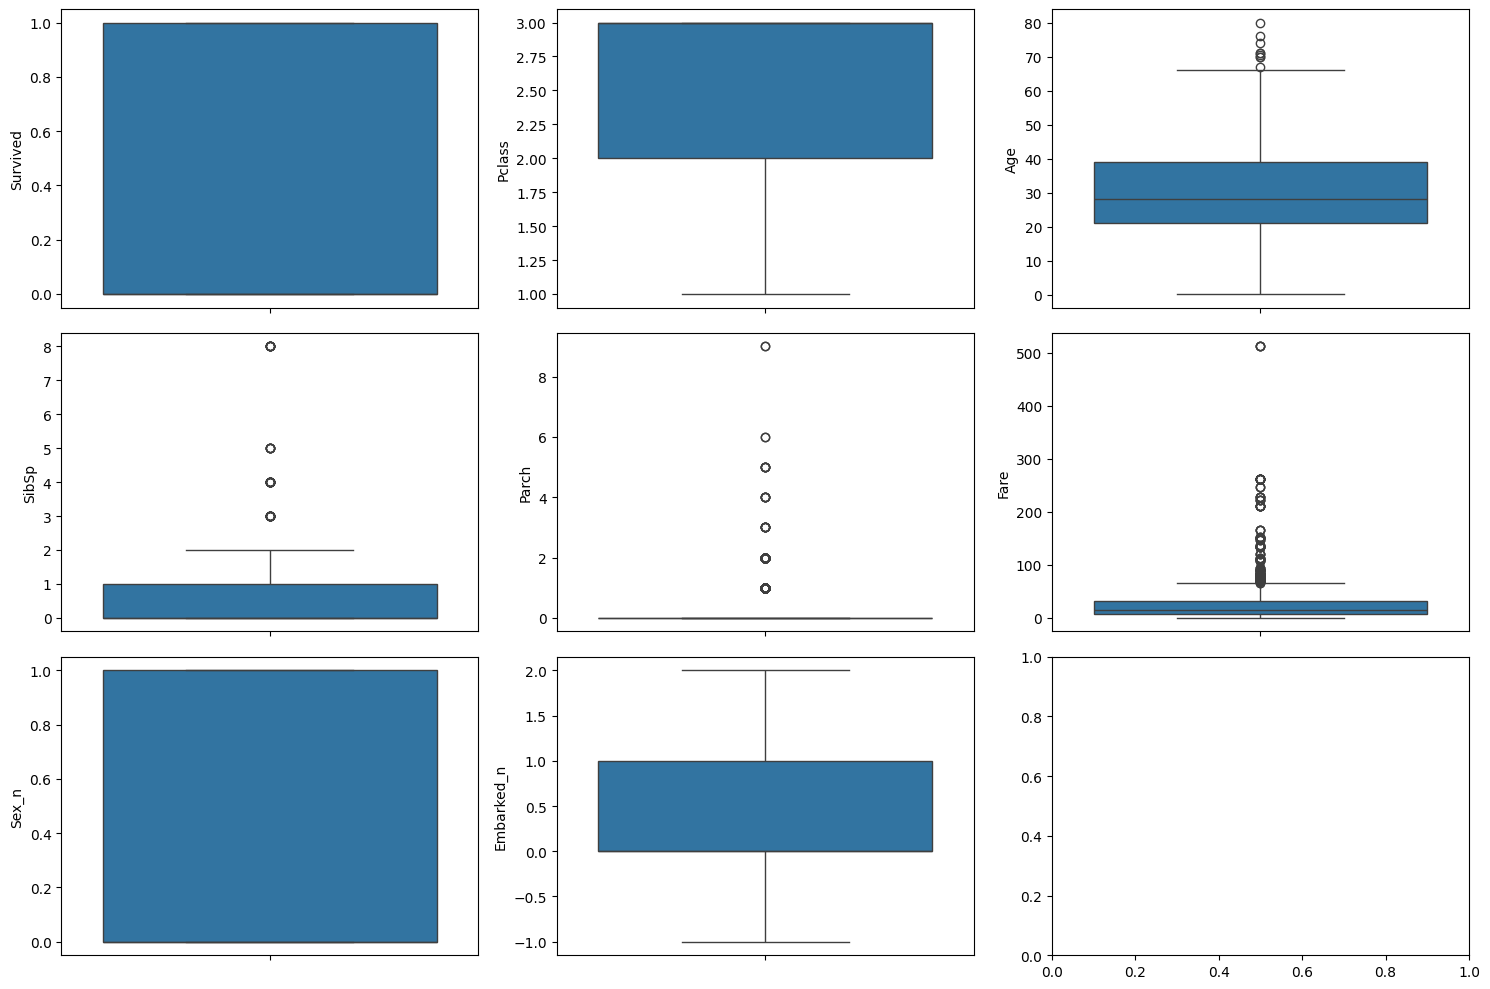

In [25]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "Survived")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "Pclass")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "Age")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "SibSp")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "Parch")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "Fare")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "Sex_n")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "Embarked_n")

plt.tight_layout()

plt.show()

In [26]:
fare_stats = total_data["Fare"].describe()
fare_stats

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [27]:
fare_iqr = fare_stats["75%"] - fare_stats["25%"]
upper_limit = fare_stats["75%"] + 1.5 * fare_iqr
lower_limit = fare_stats["25%"] - 1.5 * fare_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 66.34 y -27.17, con un rango intercuartílico de 23.38


Basándonos en estos resultados, deberíamos eliminar los registros de los pasajeros cuyo importe de billete supere los 65 dólares. Sin embargo, nuestro criterio es muy importante aquí y, según los precios que vimos en el diagrama de caja, los valores más extremos están por encima de 300. Veamos cuántos valores representan ese valor extremo de 512:

In [28]:
total_data[total_data["Fare"] > 300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,Embarked_n
258,1,1,female,35.0,0,0,512.3292,C,1,1
679,1,1,male,36.0,0,1,512.3292,C,0,1
737,1,1,male,35.0,0,0,512.3292,C,0,1
1234,1,1,female,58.0,0,1,512.3292,C,1,1


#### Análisis de valores faltantes

Un valor faltante (missing value) es un espacio que no tiene valor asignado en la observación de una variable específica. Este tipo de valores son bastante comunes y pueden surgir por muchas razones. Por ejemplo, podría haber un error en la recopilación de datos, alguien podría haberse negado a responder una pregunta en una encuesta, o simplemente podría ser que cierta información no esté disponible o no sea aplicable.

La función isnull() es una poderosa herramienta para obtener esta información:

In [29]:
total_data.isnull().sum().sort_values(ascending=False)

Age           263
Embarked        2
Fare            1
Survived        0
Pclass          0
Sex             0
Parch           0
SibSp           0
Sex_n           0
Embarked_n      0
dtype: int64

In [31]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

Age           0.200917
Embarked      0.001528
Fare          0.000764
Survived      0.000000
Pclass        0.000000
Sex           0.000000
Parch         0.000000
SibSp         0.000000
Sex_n         0.000000
Embarked_n    0.000000
dtype: float64

In [32]:
total_data["Age"].fillna(total_data["Age"].median(), inplace = True)
total_data["Embarked"].fillna(total_data["Embarked"].mode()[0], inplace = True)
total_data["Fare"].fillna(total_data["Fare"].mean(), inplace = True)

total_data.isnull().sum()

/tmp/ipykernel_7182/2217096781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  total_data["Age"].fillna(total_data["Age"].median(), inplace = True)
/tmp/ipykernel_7182/2217096781.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Sex_n         0
Embarked_n    0
dtype: int64

### Inferencia de nuevas características

In [33]:
total_data["FamMembers"] = total_data["SibSp"] + total_data["Parch"]

total_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,Embarked_n,FamMembers
0,0,3,male,22.0,1,0,7.2500,S,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,1,1
2,1,3,female,26.0,0,0,7.9250,S,1,0,0
3,1,1,female,35.0,1,0,53.1000,S,1,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,0,0


### Escalado de valores

In [34]:
from sklearn.model_selection import train_test_split

num_variables = ["Pclass", "Age", "Fare", "Sex_n", "Embarked_n", "FamMembers"]

# Dividimos el conjunto de datos en muestras de train y test
X = total_data.drop("Survived", axis = 1)[num_variables]
y = total_data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pclass,Age,Fare,Sex_n,Embarked_n,FamMembers
772,2,57.0,10.500,1,0,0
543,2,32.0,26.000,0,0,1
289,3,22.0,7.750,1,2,0
10,3,4.0,16.700,1,0,2
147,3,9.0,34.375,1,0,4


### Normalización

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,Pclass,Age,Fare,Sex_n,Embarked_n,FamMembers
772,-0.331309,2.160657,-0.467908,1.355507,-0.586065,-0.555242
543,-0.331309,0.190910,-0.150474,-0.737732,-0.586065,0.062546
289,0.852582,-0.596989,-0.524227,1.355507,2.536631,-0.555242
10,0.852582,-2.015207,-0.340935,1.355507,-0.586065,0.680333
147,0.852582,-1.621257,0.021043,1.355507,-0.586065,1.915909


### Escalado Mínimo-Máximo

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,Pclass,Age,Fare,Sex_n,Embarked_n,FamMembers
772,0.5,0.749440,0.020495,1.0,0.333333,0.0
543,0.5,0.419755,0.050749,0.0,0.333333,0.1
289,1.0,0.287881,0.015127,1.0,1.000000,0.0
10,1.0,0.050508,0.032596,1.0,0.333333,0.2
147,1.0,0.116445,0.067096,1.0,0.333333,0.4
